# Visualizing the seizure data

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import os
from datetime import datetime
%matplotlib inline

Find the most recent saved dataset and extract the date. 

In [5]:
if len(os.listdir('data/')) > 0:
    matches = [file for file in os.listdir('data/') if "cbp_data_" in file]
    dates = ([datetime.strptime(match.replace('cbp_data_', '')
                                   .replace('.csv', ''), "%Y-%m-%d")
                 .date() for match in matches])
    current_date = max(dates)
else:
    raise ValueError('Error:\nNo files in the "data/" directory')

Load the most recent data, make a properly formated `date` column, and filtering the data to just the Southwest Border region.

In [7]:
filename = 'data/cbp_data_' + str(current_date) + '.csv'
cbp_data = pd.read_csv(filename)
cbp_data['FY'] = cbp_data['FY'].str.replace(' (FYTD)', '')
cbp_data['date'] = pd.to_datetime(cbp_data['FY'] + '-' + cbp_data['Month (abbv)'] + '-' + '01',
                                  format="%Y-%b-%d")

sw_data = cbp_data[cbp_data['Region'] == 'Southwest Border']

# there are some weird dates that haven't happened yet
sw_data = sw_data[sw_data['date'] < datetime.strptime(str(current_date), "%Y-%m-%d")]

Subsetting the data for fentanyl seizures and collapsing the data by month.

In [9]:
f_data = sw_data[sw_data['Drug Type']=='Fentanyl']
f_data = f_data.groupby('date', as_index=False)[['Sum Qty (lbs)']].sum()

/var/folders/7g/wv3507s93tv8lps8b6zzhysc0000gn/T/ipykernel_14355/3224282604.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(np.arange(0,max(f_data['Sum Qty (lbs)']),500, dtype=int),


Text(0.12, 0.01, 'Source: US Customs and Border Patrol')

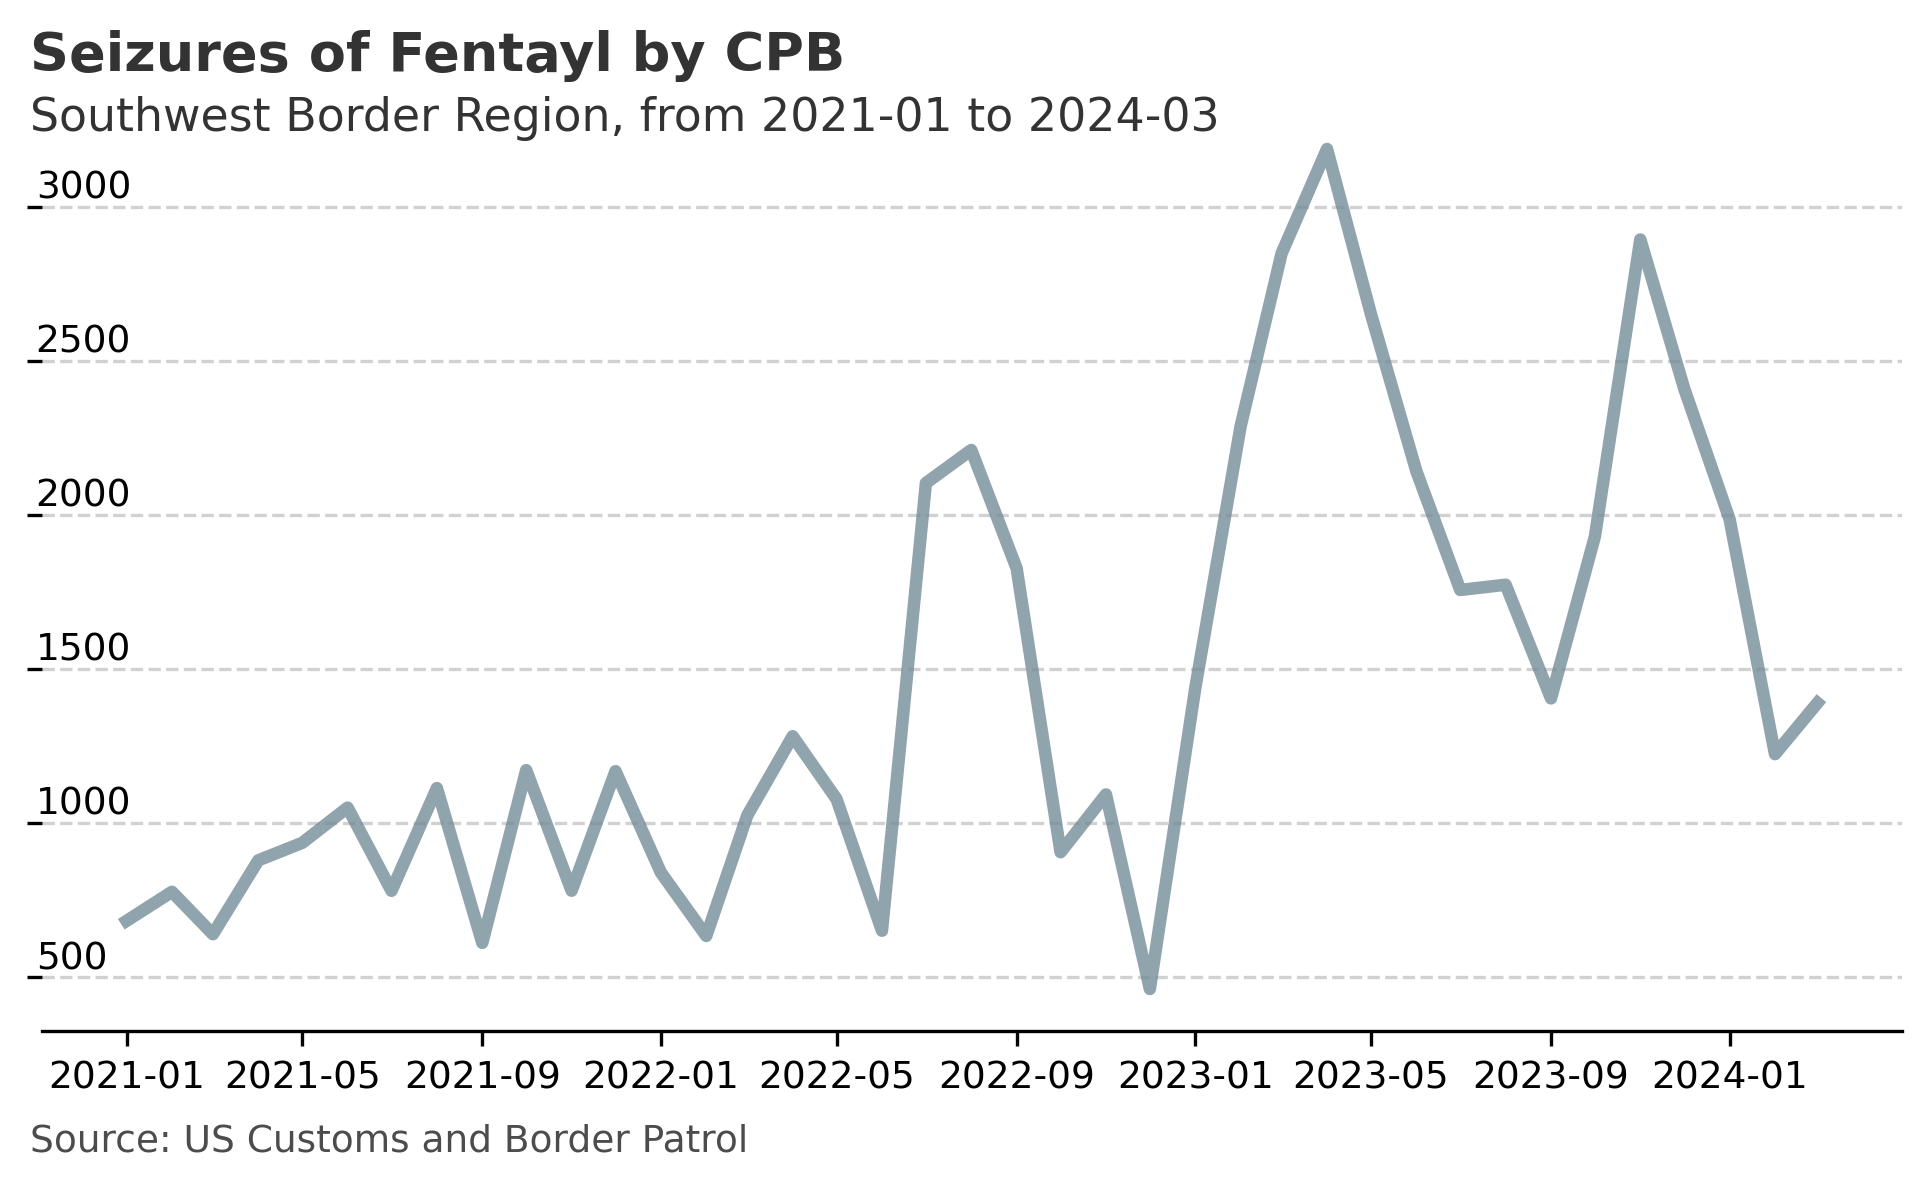

In [10]:
# This makes our plots higher resolution
plt.rcParams['figure.dpi'] = 300

# Setup plot size.
fig, ax = plt.subplots(figsize=(8,4))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='y', color='#b3b3b3', alpha=0.6, zorder=1, linestyle='--')

ax.plot(f_data['date'], f_data['Sum Qty (lbs)'], color='#758D99', alpha=0.8, linewidth=3)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','left']].set_visible(False)

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labelsize=9) 

# Reformat y-axis tick labels
ax.set_yticklabels(np.arange(0,max(f_data['Sum Qty (lbs)']),500, dtype=int),            
                   ha = 'left',                 
                   verticalalignment='bottom')  

ax.yaxis.set_tick_params(pad=-2,            
                         labeltop=True,     
                         labelbottom=False, 
                         bottom=False,      
                         labelsize=9)       

ax.yaxis.set_ticks_position('left')

# Add in title and subtitle
start_date = str(min(f_data['date']).date())[0:7]
end_date = str(max(f_data['date']).date())[0:7]
ax.text(x=0.12, y=.91, s="Seizures of Fentayl by CPB", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=0.12, y=.86, s=f"Southwest Border Region, from {start_date} to {end_date}", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=0.12, y=0.01, s="Source: US Customs and Border Patrol", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)


And now with the data on methamphetamine seizures.

In [77]:
m_data = sw_data[sw_data['Drug Type']=='Methamphetamine']
m_data = m_data.groupby('date', as_index=False)[['Sum Qty (lbs)']].sum()

# convert pounds to kilograms
m_data['kilos'] = m_data['Sum Qty (lbs)'] / 2.2

/var/folders/7g/wv3507s93tv8lps8b6zzhysc0000gn/T/ipykernel_14355/517865407.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(np.arange(0,max(m_data['Sum Qty (lbs)']),500, dtype=int),


Text(0.12, 0.01, 'Source: US Customs and Border Patrol')

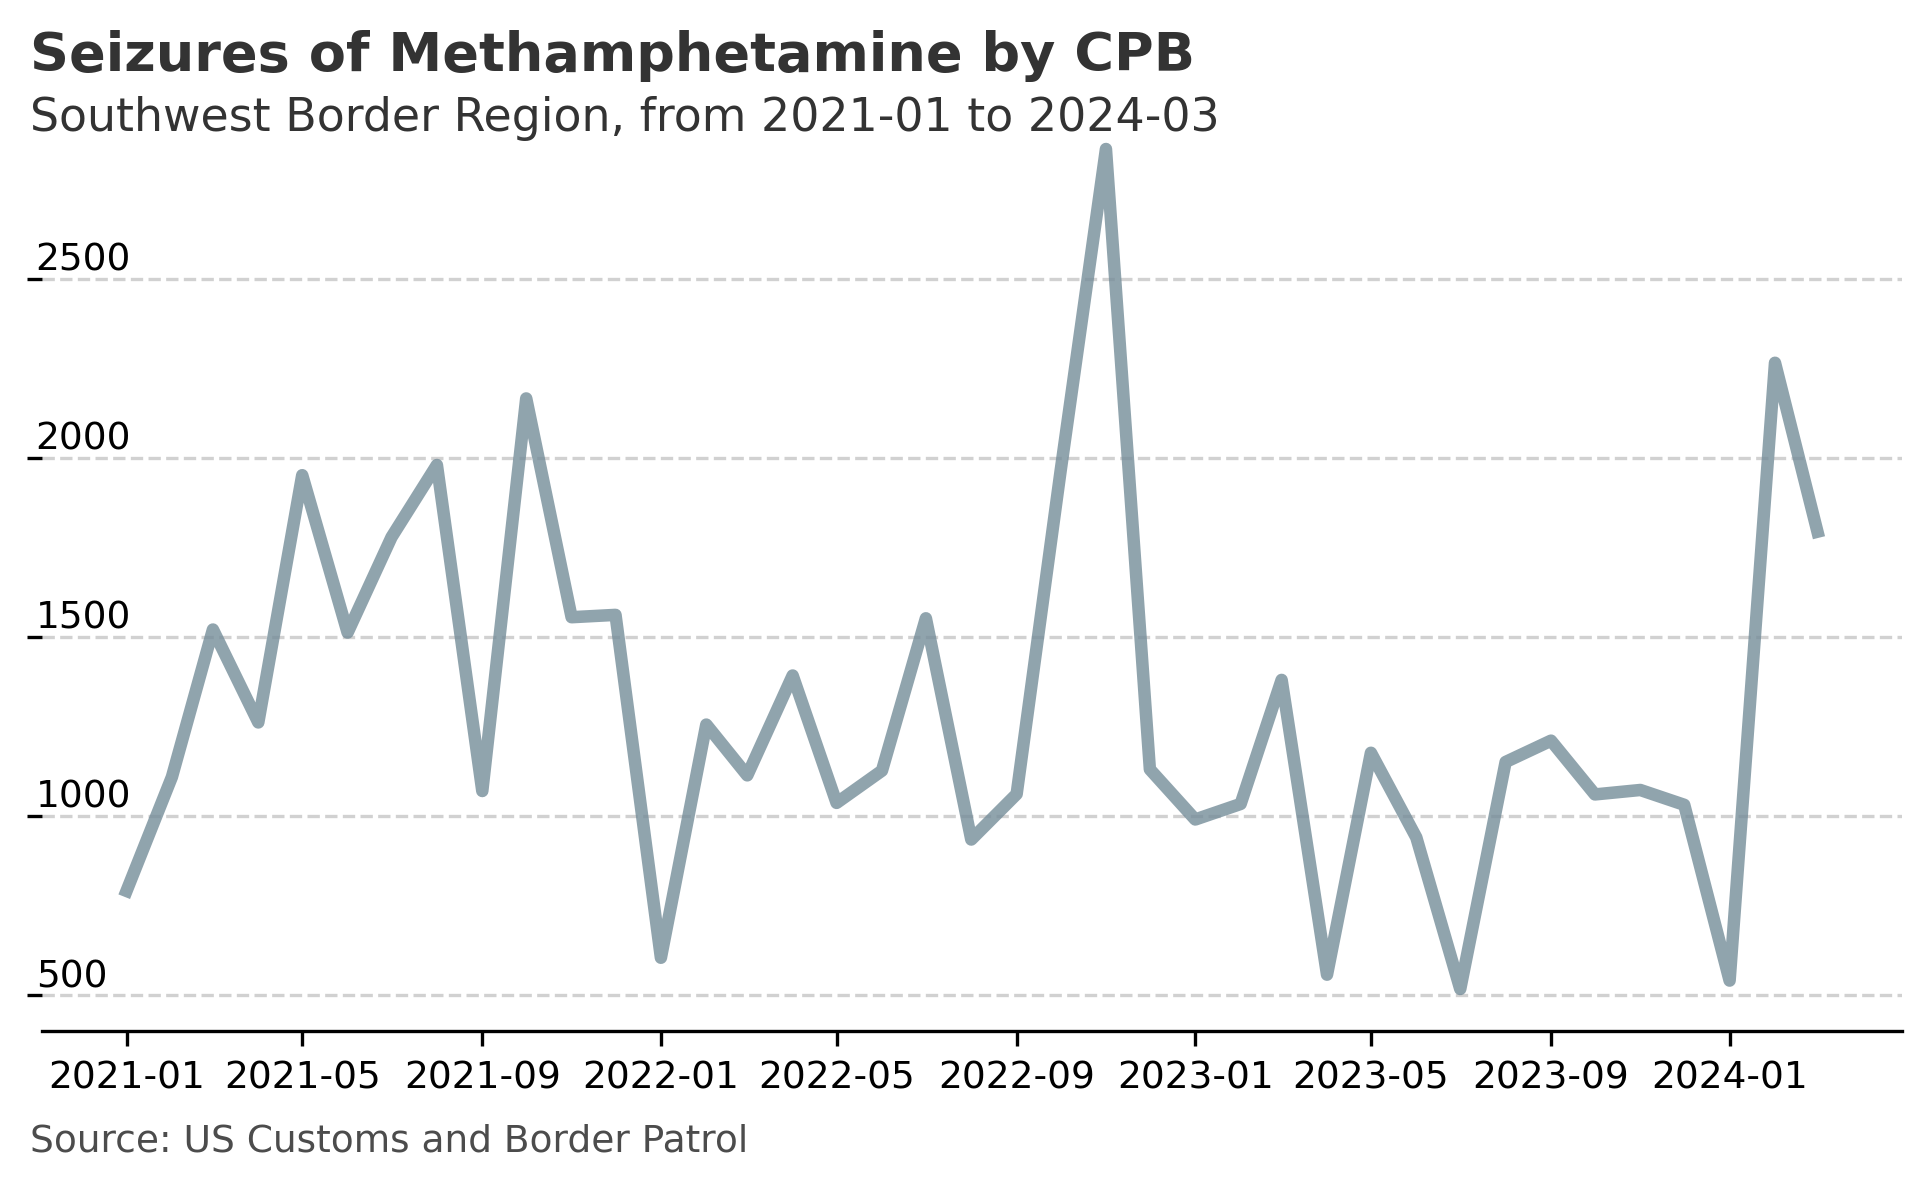

In [13]:
# Setup plot size.
fig, ax = plt.subplots(figsize=(8,4))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='y', color='#b3b3b3', alpha=0.6, zorder=1, linestyle='--')

ax.plot(m_data['date'], m_data['Sum Qty (lbs)'], color='#758D99', alpha=0.8, linewidth=3)


# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','left']].set_visible(False)

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labelsize=9)        # Set tick label size

# Reformat y-axis tick labels
ax.set_yticklabels(np.arange(0,max(m_data['Sum Qty (lbs)']),500, dtype=int),        
                   ha = 'left',               
                   verticalalignment='bottom')

ax.yaxis.set_tick_params(pad=-2,             
                         labeltop=True,      
                         labelbottom=False,  
                         bottom=False,       
                         labelsize=9)       

ax.yaxis.set_ticks_position('left')

# Add in title and subtitle
start_date = str(min(m_data['date']).date())[0:7]
end_date = str(max(m_data['date']).date())[0:7]
ax.text(x=0.12, y=.91, s="Seizures of Methamphetamine by CPB", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=0.12, y=.86, s=f"Southwest Border Region, from {start_date} to {end_date}", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=0.12, y=0.01, s="Source: US Customs and Border Patrol", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)


In [14]:
import plotly.express as px

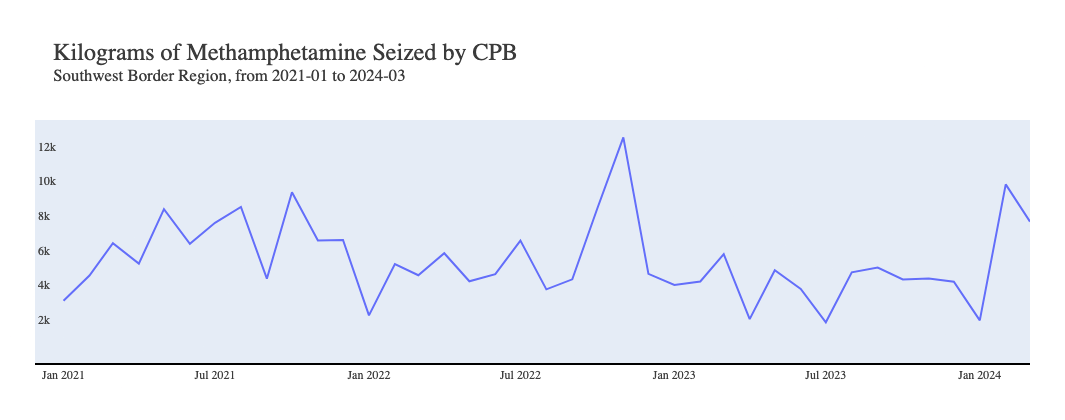

In [186]:
start_date = str(min(m_data['date']).date())[0:7]
end_date = str(max(m_data['date']).date())[0:7]


fig = px.line(m_data, x="date", y="kilos",
             labels={
                     "date": "",
                     "kilos": "Kilograms Seized"
                 },
             hover_data={
                         "date": False,
                         "kilos": ":.0f"
             })

fig.update_layout(
    title=dict(text=f"Kilograms of Methamphetamine Seized by CPB<br><sup>Southwest Border Region, from {start_date} to {end_date}</sup>",
               font=dict(size=24), automargin=False),
    font_family="Open Sans",
    font_color="#3B3B3B",
    title_font_family="Open Sans",
    hovermode="x unified"
)

fig.update_layout(height=420, width=640,
                 margin_t=120,
                 margin_b=35,
                 margin_l=35,
                 margin_r=35)

fig.update_yaxes(ticklabelposition="inside top", title=None)

fig.update_xaxes(showgrid=False, showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showgrid=False, zeroline=True, range=[0, m_data['kilos'].max()+1000])
fig.show()

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~chris/1638.embed" height="525" width="100%"></iframe>'

In [189]:
fig.write_html("index.html")